In [344]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [345]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [346]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [347]:
data_combined = [train_df,test_df]

In [348]:
train_df.info()
print("-"*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [349]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [350]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [351]:
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [352]:
test_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [353]:
train_df[["Survived","Pclass"]].groupby("Pclass", as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [354]:
train_df[["Survived","Sex"]].groupby("Sex", as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [355]:
train_df[["Survived","SibSp"]].groupby("SibSp", as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [356]:
train_df[["Survived","Parch"]].groupby("Parch", as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


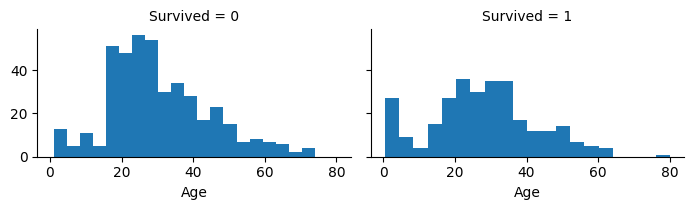

In [357]:
g = sns.FacetGrid(train_df, col="Survived", height=2.2, aspect=1.6)
g.map(plt.hist, "Age", bins=20)

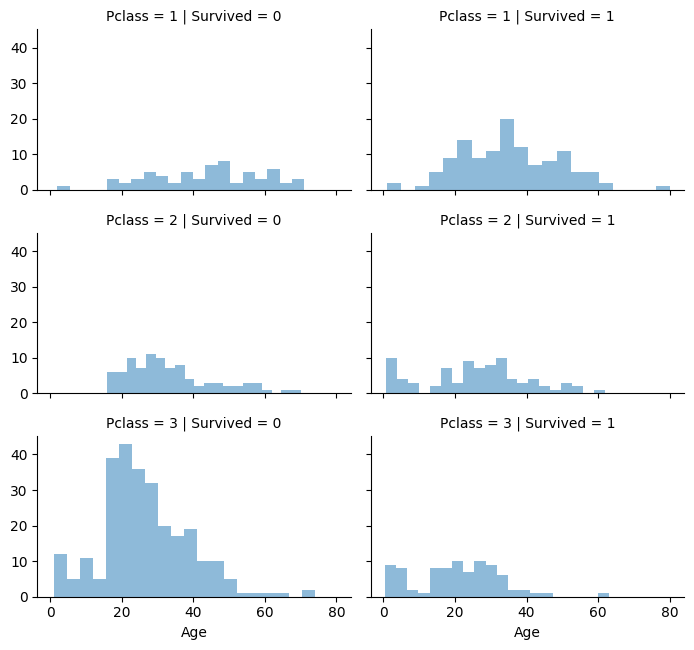

In [358]:
g = sns.FacetGrid(train_df, col="Survived",row="Pclass", height=2.2, aspect=1.6)
g.map(plt.hist, "Age", bins=20, alpha=.5)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


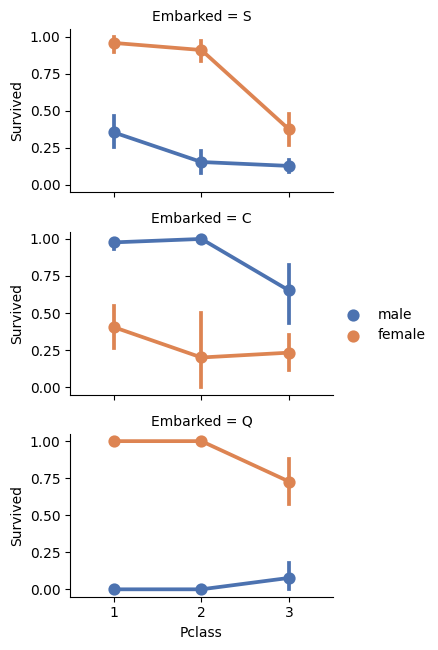

In [359]:
g = sns.FacetGrid(train_df,row="Embarked", height=2.2, aspect=1.6)
g.map(sns.pointplot, "Pclass","Survived", "Sex", palette='deep')
g.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


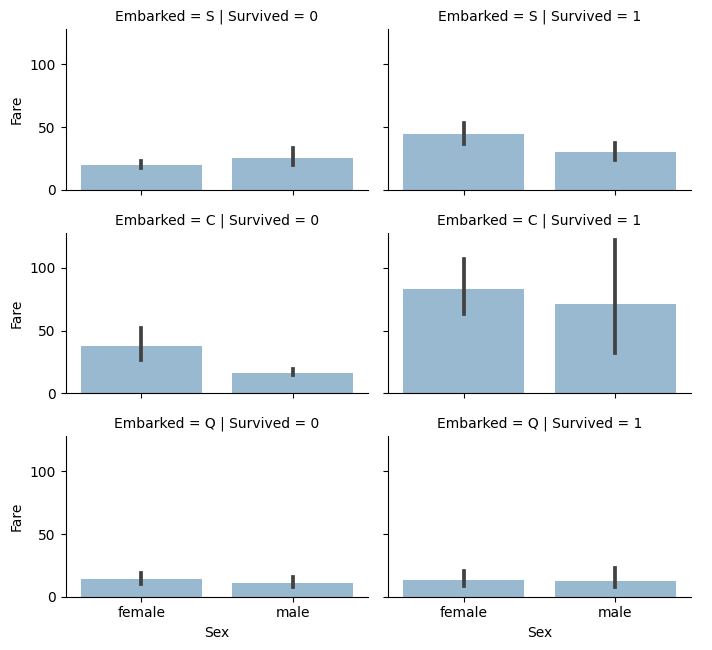

In [360]:
g = sns.FacetGrid(train_df, col="Survived",row="Embarked", height=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
g.add_legend()

In [361]:
train_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [362]:
combined = [train_df, test_df]

In [363]:
for dataset in combined:
    dataset["Title"] = dataset.Name.str.extract("([A-Za-z]+)\.")
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [364]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [365]:
for dataset in combined:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major'\
                                                , 'Rev', 'Sir', 'Jonkheer', 'Dona'], "Rare")
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")

In [366]:
train_df[["Survived", "Title"]].groupby("Title", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [367]:
titles_mapping = {"Mrs":1, "Miss":2, "Master":3, "Rare":4, "Mr":5}

for dataset in combined:
    dataset["Title"] = dataset["Title"].map(titles_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5


In [368]:
train_df.drop(['Name', 'PassengerId'], axis=1, inplace=True)

In [369]:
test_df.drop(['Name', 'PassengerId'], axis=1, inplace=True)

In [370]:
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [371]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,5
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,5


In [372]:
correlation_matrix = train_df.drop("Embarked", axis=1).corr()

abs(correlation_matrix["Age"]).sort_values(ascending=False)

Age         1.000000
Pclass      0.369226
SibSp       0.308247
Parch       0.189119
Title       0.136456
Fare        0.096067
Sex         0.093254
Survived    0.077221
Name: Age, dtype: float64

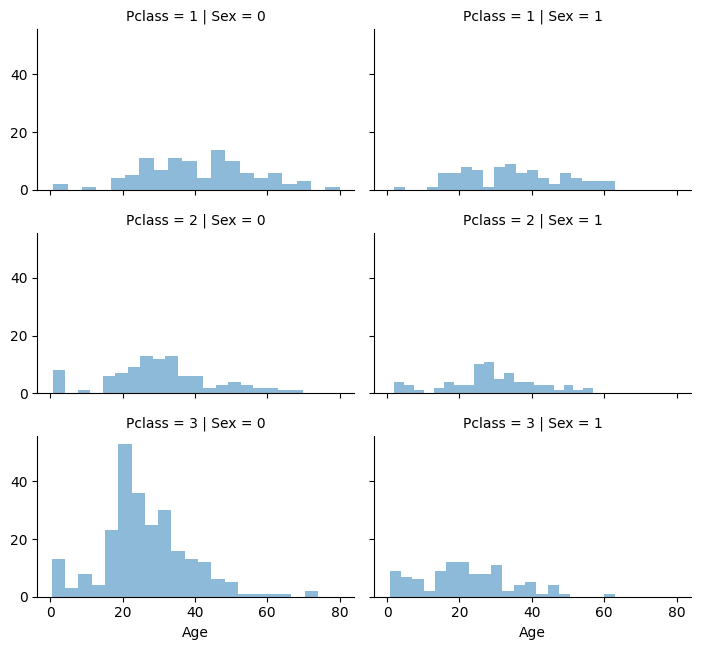

In [373]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [374]:
for dataset in combined:
    for i in range(2):
        for j in range(3):
            part_df = dataset[(dataset["Pclass"]==j+1)&(dataset["Sex"]==i)]["Age"].dropna()
            
            median_age = part_df.median()
            median_age = int( median_age/0.5 + 0.5 ) * 0.5
            
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = median_age
    dataset['Age'] = dataset['Age'].astype(int)

In [375]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,5
1,1,1,1,38,1,0,71.2833,C,1
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,1
4,0,3,0,35,0,0,8.0500,S,5


In [376]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [377]:
train_df["AgeBand"] = pd.cut(train_df["Age"], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

/tmp/ipykernel_33/3693176463.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [378]:
for dataset in combined:
    dataset.loc[(dataset.Age<=16), "Age"] = 0
    dataset.loc[(dataset.Age>=16) &  (dataset.Age<=32), "Age"] = 1
    dataset.loc[(dataset.Age>=32) &  (dataset.Age<=48), "Age"] = 2
    dataset.loc[(dataset.Age>=48) &  (dataset.Age<=64), "Age"] = 3
    dataset.loc[(dataset.Age>=64), "Age"] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,5,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,1,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,1,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,5,"(32.0, 48.0]"


In [379]:
for dataset in combined:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [380]:
for dataset in combined:
    dataset['IsAlone'] = 1
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [381]:
for dataset in combined:
    dataset.drop(["SibSp", "Parch", "FamilySize"], axis=1, inplace=True)
    
combined = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,1,7.2500,S,5,"(16.0, 32.0]",0
1,1,1,1,2,71.2833,C,1,"(32.0, 48.0]",0
2,1,3,1,1,7.9250,S,2,"(16.0, 32.0]",1
3,1,1,1,2,53.1000,S,1,"(32.0, 48.0]",0
4,0,3,0,2,8.0500,S,5,"(32.0, 48.0]",1


In [382]:
freq = train_df.Embarked.dropna().mode()[0]
freq

'S'

In [383]:
for dataset in combined:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq)
    dataset["Embarked"] = dataset["Embarked"].map({"C":0, "Q":1, "S":2})
    
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,0,0.553571
1,1,0.389610
2,2,0.339009


In [384]:
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].dropna().median())
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,1,7.2500,2,5,"(16.0, 32.0]",0
1,1,1,1,2,71.2833,0,1,"(32.0, 48.0]",0
2,1,3,1,1,7.9250,2,2,"(16.0, 32.0]",1
3,1,1,1,2,53.1000,2,1,"(32.0, 48.0]",0
4,0,3,0,2,8.0500,2,5,"(32.0, 48.0]",1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,13.0000,2,4,"(16.0, 32.0]",1
887,1,1,1,1,30.0000,2,2,"(16.0, 32.0]",1
888,0,3,1,1,23.4500,2,2,"(16.0, 32.0]",0
889,1,1,0,1,30.0000,0,5,"(16.0, 32.0]",1


In [385]:
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].dropna().median())

In [386]:
train_df["FareBand"] = pd.qcut(train_df["Fare"], 4)
train_df[["FareBand", "Survived"]].groupby("FareBand").mean().sort_values(by="Survived", ascending=False)

/tmp/ipykernel_33/922092784.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[["FareBand", "Survived"]].groupby("FareBand").mean().sort_values(by="Survived", ascending=False)


,Survived
FareBand,
"(31.0, 512.329]",0.581081
"(14.454, 31.0]",0.454955
"(7.91, 14.454]",0.303571
"(-0.001, 7.91]",0.197309


In [387]:
for dataset in combined:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,1,0,2,5,"(16.0, 32.0]",0
1,1,1,1,2,3,0,1,"(32.0, 48.0]",0
2,1,3,1,1,1,2,2,"(16.0, 32.0]",1
3,1,1,1,2,3,2,1,"(32.0, 48.0]",0
4,0,3,0,2,1,2,5,"(32.0, 48.0]",1
5,0,3,0,1,1,1,5,"(16.0, 32.0]",1
6,0,1,0,3,3,2,5,"(48.0, 64.0]",1
7,0,3,0,0,2,2,3,"(-0.08, 16.0]",0
8,1,3,1,1,1,2,1,"(16.0, 32.0]",0
9,1,2,1,0,2,0,1,"(-0.08, 16.0]",0


In [395]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [397]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.74

In [398]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
6,IsAlone,0.397318
3,Fare,-0.170254
4,Embarked,-0.348647
1,Sex,-0.367094
2,Age,-0.419944
5,Title,-1.020053
0,Pclass,-1.250235


In [399]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
Y_pred = DT.predict(X_test)
acc_DT = round(DT.score(X_train, y_train) * 100, 2)
acc_DT

87.08

In [400]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
Y_pred = RF.predict(X_test)
acc_RF = round(RF.score(X_train, y_train) * 100, 2)
acc_RF

87.08

In [401]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.01

In [402]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

83.85

In [403]:
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVC", "K Neighbors"]

scores = [acc_log, acc_DT, acc_RF, acc_svc, acc_knn]

models_df = pd.DataFrame({
    "Models" : models,
    "Scores" : scores})
models_df.sort_values(by='Scores', ascending=False)

,Models,Scores
1,Decision Tree,87.08
2,Random Forest,87.08
4,K Neighbors,83.85
3,SVC,83.01
0,Logistic Regression,81.74


In [404]:
pred = RF.predict(test_df)

In [409]:

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": pred
    })
submission.to_csv('submission_2.csv', index=False)